# FIT5202 Data processing for Big Data
# Assignment 2B: <h3>Real-time stream processing on big data</h3>

Student Name: PEIYU LIU
<br>Student ID: 31153291

<h1>2 Consuming data using Kafka</h1>
<br>Kafka consumer

visualising the countFlightRecords in real time based on the timestamp
- x-axis can be used to represent the timestamp
- y-axis can be used to represent the number of countFlightRecords data
- 2-minutes (use the processing time)
- number of flights for keyFlight = ‘1’, keyFlight = ‘2’, and keyFlight = ‘3’ only
- line charts

<IPython.core.display.Javascript object>


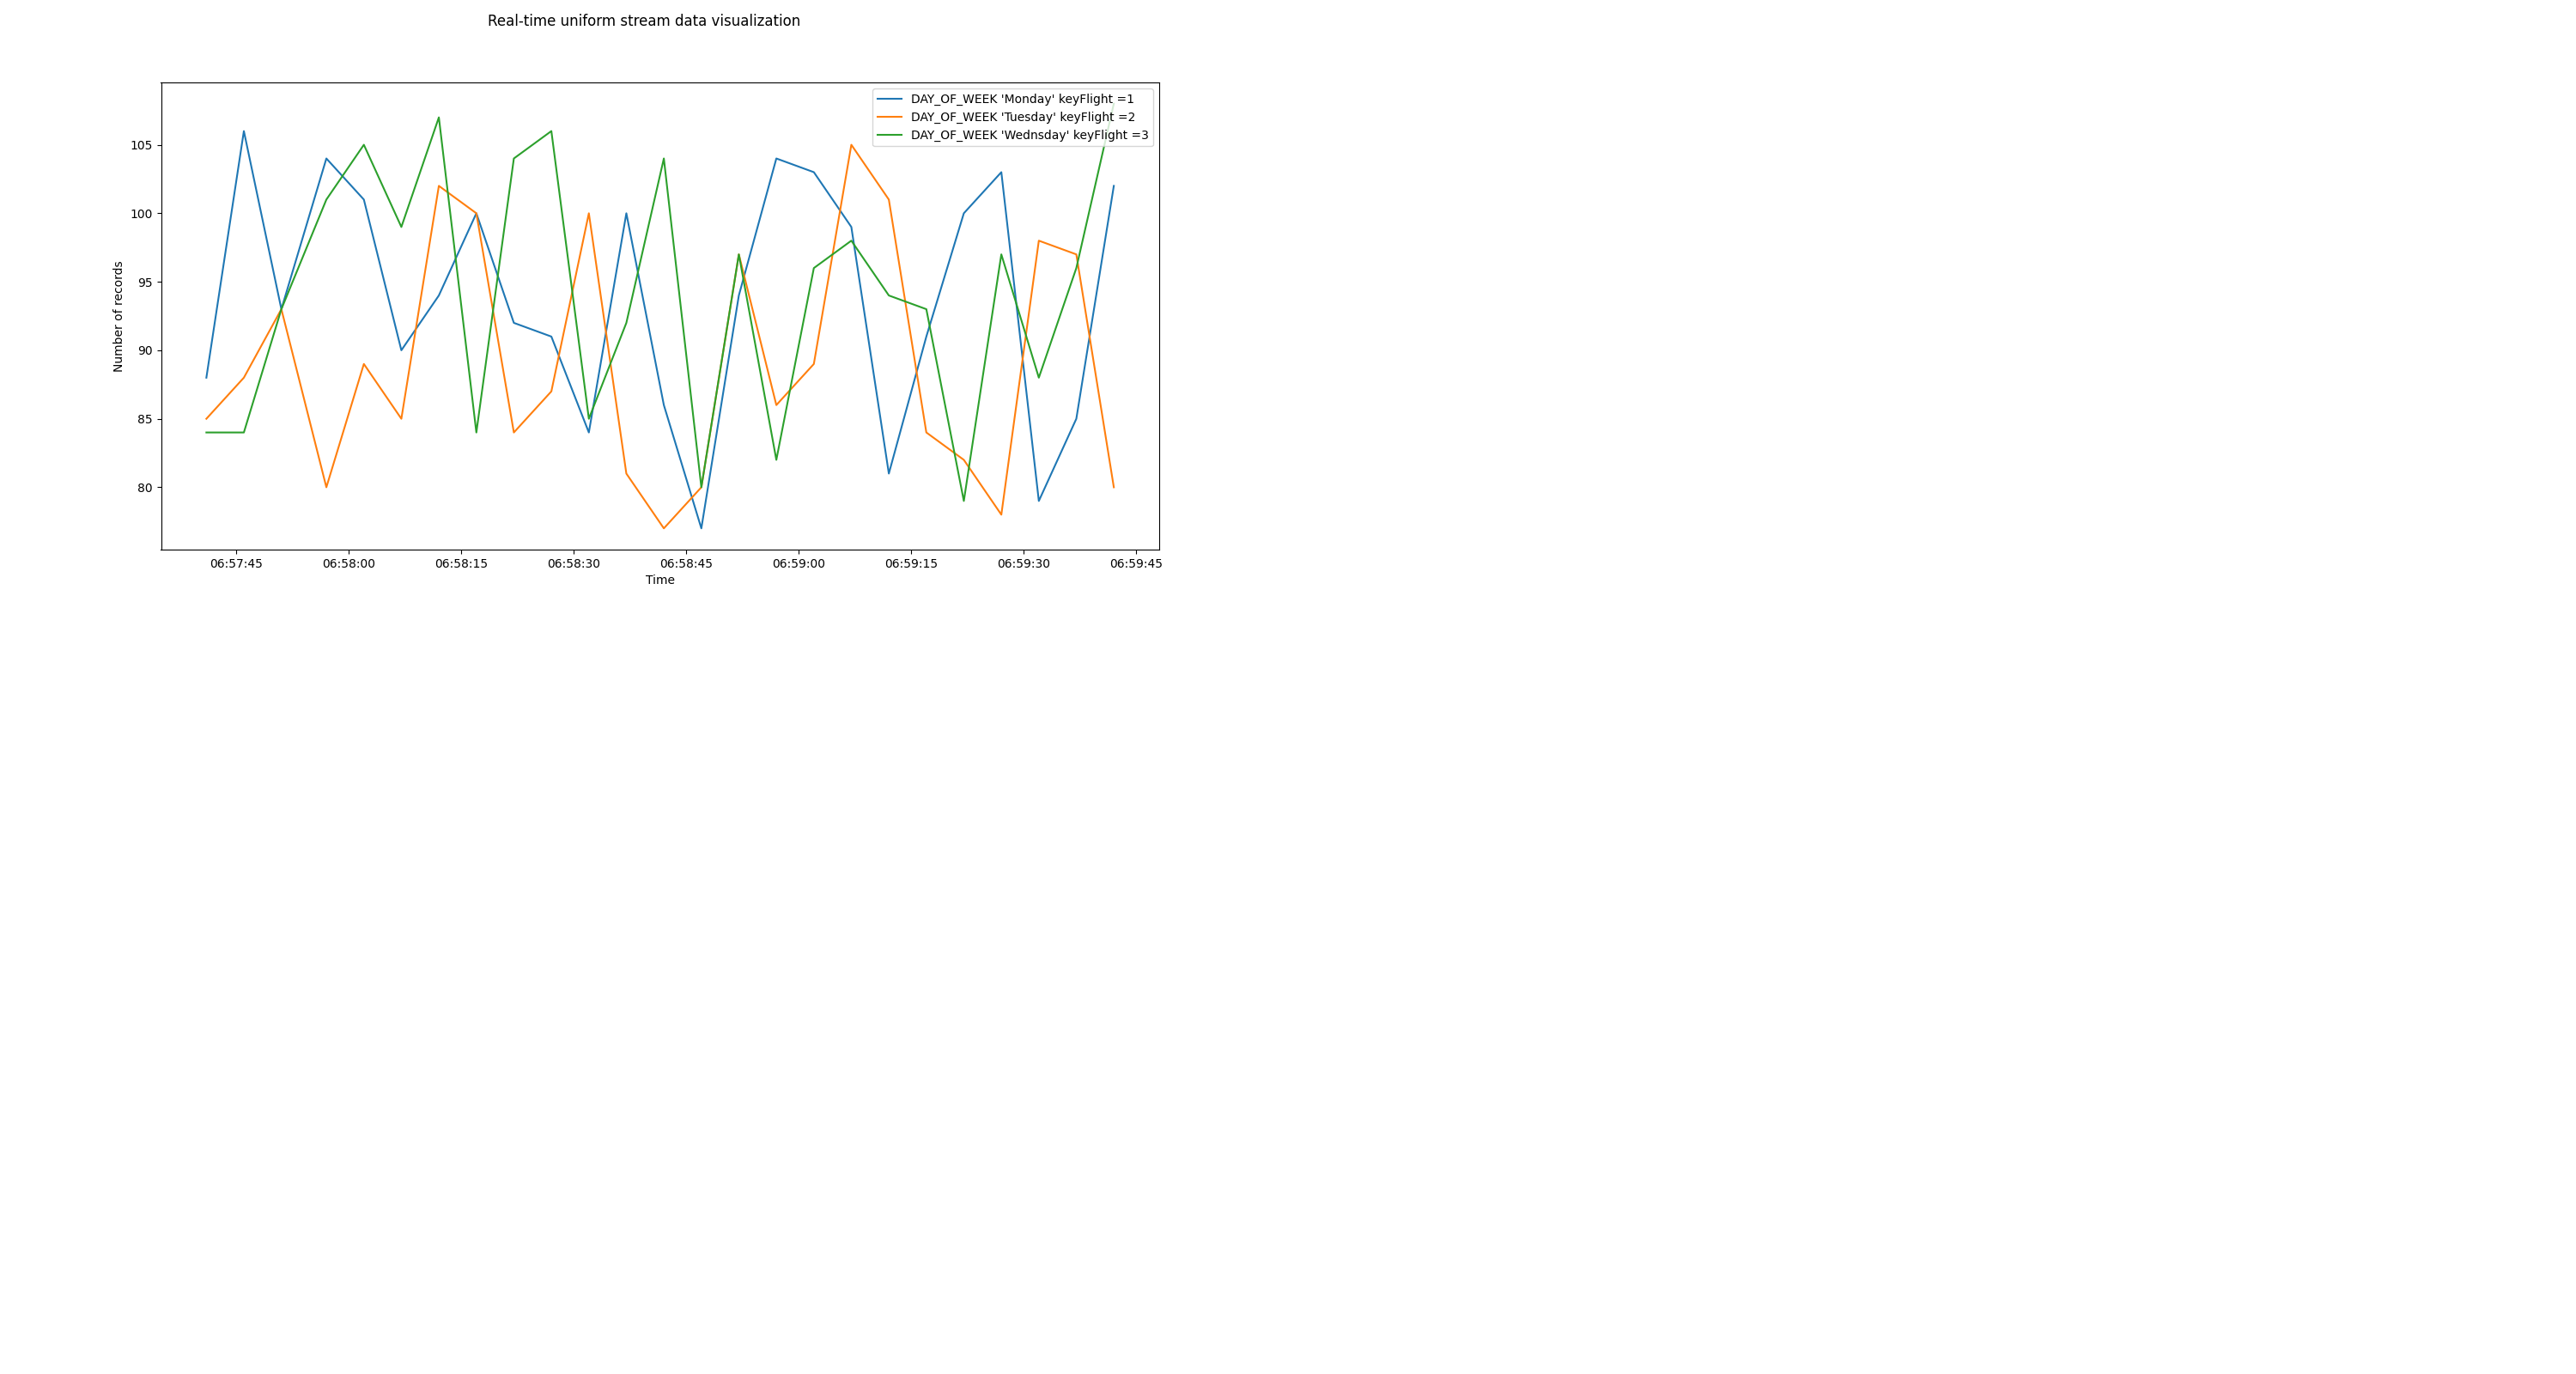

In [ ]:
# import libraries
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
from json import loads
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'flightTopic'

# used from week11 tutorial tasks
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, # stop iteration if no message after 20 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   # Convert the JSON object and decode it
                                   # https://docs.python.org/3/library/json.html
                                   value_deserializer=lambda x:loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

# used from week11 tutorial tasks
def init_plots():
    try:
        # set div attributes
        width = 15
        height = 8
        # set size
        fig = plt.figure(figsize=(width,height)) # create new figure
        #autofmt_xdate() Rotation module right aligned
        fig.autofmt_xdate()
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value') 
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
# used from week11 tutorial tasks
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
    
        x_timestamp,keyflight_1,keyflight_2,keyflight_3 = [],[],[],[]
        # print('Waiting for messages')
        for message in consumer:
            keyflight1_number,keyflight2_number,keyflight3_number=0,0,0
            time_container = []
            for key_day in message.value:
                 #print the number of flights for 
                    #keyFlight = ‘1’, 
                    #keyFlight = ‘2’, 
                    #keyFlight = ‘3’
                if key_day['DAY_OF_WEEK']==1:
                    keyflight1_number+=1
                elif key_day['DAY_OF_WEEK'] ==2:
                    keyflight2_number+=1
                elif key_day['DAY_OF_WEEK']==3:
                    keyflight3_number +=1
                time_container.append(dt.datetime.fromtimestamp(key_day['ts']))
            x_timestamp.append(time_container[0]) 
            keyflight_1.append(keyflight1_number)
            keyflight_2.append(keyflight2_number)
            keyflight_3.append(keyflight3_number)
            # print(y)
            #last 2-minutes step 5 seconds, 24 numbers of value
            # https://matplotlib.org/stable/tutorials/introductory/pyplot.html
            # draw line chart
            if len(keyflight_1) > 24: #2*60/5=24
                ax.clear()
                # set line keyflight =1
                ax.plot(x_timestamp, keyflight_1,label="DAY_OF_WEEK 'Monday' keyFlight =1")
                # set line keyflight =2
                ax.plot(x_timestamp, keyflight_2,label="DAY_OF_WEEK 'Tuesday' keyFlight =2")
                # set line keyflight =3
                ax.plot(x_timestamp, keyflight_3,label="DAY_OF_WEEK 'Wednsday' keyFlight =3")
                #https://matplotlib.org/stable/tutorials/introductory/pyplot.html
                #set labels and legend
                ax.set_xlabel('Time')
                ax.set_ylabel('Number of records')
                ax.legend(loc='best')
                fig.canvas.draw()
                x_timestamp.pop(0) # removing the item in the first position
                keyflight_1.pop(0)
                keyflight_2.pop(0)
                keyflight_3.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    # invoke functions to generate figure
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)    